# PART I:EDA & Data Preprocessing on Google App Store Rating Dataset.



# Questions:-Import required libraries and read the dataset.

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [13]:
app=pd.read_csv("E:\\GLC\\python\\assignment\\Apps_data.csv")

In [14]:
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [15]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
app.shape

(10841, 13)

In [17]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [18]:
app.describe() #numerical columns summary statistics only

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
app.select_dtypes(include=['object']).columns.tolist()

#the categorical columns are category,reviews,installs,price,content,size,etc
# you must convert this categorical columns into numerical columns then only it will be useful for model building

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [20]:
app.duplicated().sum()

483

In [21]:
app.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [22]:
app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [23]:
app = app.drop(app[app['Category'] == '1.9'].index)

In [24]:
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new

In [26]:
app['Rating'].isnull().sum()

1474

In [27]:
app = app.dropna(subset=['Rating'])

In [28]:
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating > 3.5:
        return 'high'
    else:
        return 'low'

# Create a new column called Rating_category
app['Rating_category'] = app['Rating'].apply(categorize_rating)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\3842906881.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Rating_category'] = app['Rating'].apply(categorize_rating)


In [30]:
app['Rating_category'].count()

9366

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

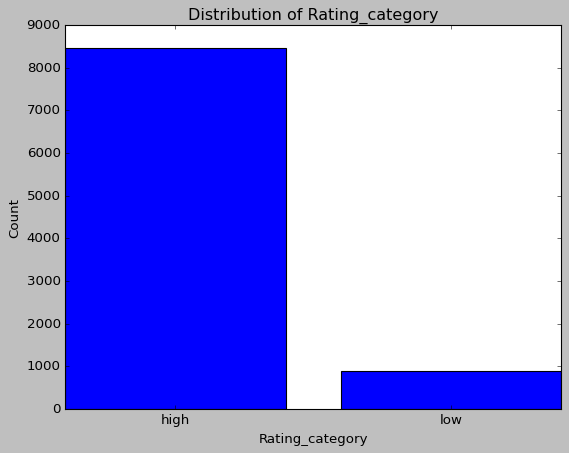

In [31]:
# Count the number of occurrences of each category
rating_counts = app['Rating_category'].value_counts()

# Plot a bar chart of the distribution
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Rating_category')
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

In [32]:
#comment:
#we can see that the majority of the apps in the dataset have a rating higher than 3.5, and only a small percentage have a rating lower than or equal to 3.5.

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\876171496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Reviews'] = app['Reviews'].astype(float)


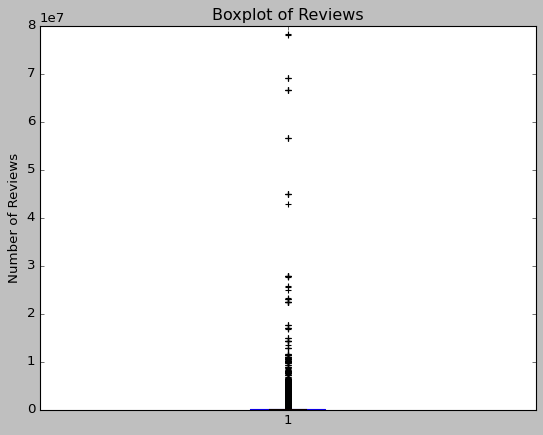

In [33]:

# Convert the Reviews column to a float data type
app['Reviews'] = app['Reviews'].astype(float)

# Plot a boxplot of the Reviews column to check for outliers
plt.boxplot(app['Reviews'])
plt.title('Boxplot of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [34]:
# Apply a log transformation to the Reviews column
app['Reviews_log'] = np.log(app['Reviews'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\2811337966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Reviews_log'] = np.log(app['Reviews'])


In [35]:
app['Reviews_log']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews_log, Length: 9366, dtype: float64

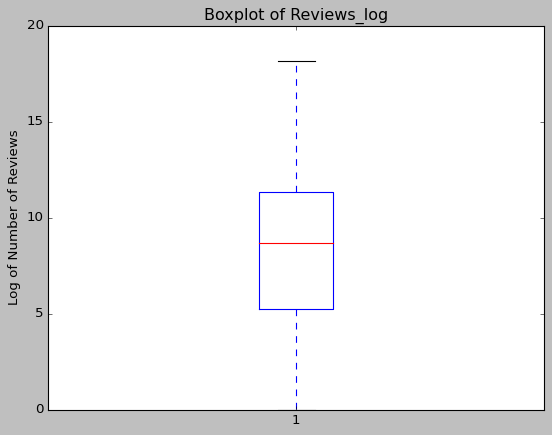

In [36]:
# Plot a boxplot of the transformed Reviews_log column
plt.boxplot(app['Reviews_log'])
plt.title('Boxplot of Reviews_log')
plt.ylabel('Log of Number of Reviews')
plt.show()

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [37]:
# Replace 'M' with '1000000' and 'K' with '1000'
app['Size'] = app['Size'].replace(['M','k'], ['1000000', '1000'], regex=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\1053774038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Size'] = app['Size'].replace(['M','k'], ['1000000', '1000'], regex=True)


In [38]:
app['Size']

0                 191000000
1                 141000000
2                8.71000000
3                 251000000
4                2.81000000
                ...        
10834            2.61000000
10836             531000000
10837            3.61000000
10839    Varies with device
10840             191000000
Name: Size, Length: 9366, dtype: object

In [39]:
# Drop rows where Size is 'Varies with device'
app = app[app['Size'] != 'Varies with device']


In [40]:
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,191000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,141000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.71000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,251000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.81000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,6191000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high,3.784190
10834,FR Calculator,FAMILY,4.0,7.0,2.61000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,531000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.61000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high,1.386294


In [41]:
# Convert Size column to float data type
app['Size'] = app['Size'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\303648540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Size'] = app['Size'].astype(float)


In [42]:
app['Size']

0        1.910000e+08
1        1.410000e+08
2        8.710000e+00
3        2.510000e+08
4        2.810000e+00
             ...     
10833    6.191000e+06
10834    2.610000e+00
10836    5.310000e+08
10837    3.610000e+00
10840    1.910000e+08
Name: Size, Length: 7729, dtype: float64

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [43]:
# Remove '+' and ',' characters from Installs column
app['Installs'] = app['Installs'].str.replace('+', '')
app['Installs'] = app['Installs'].str.replace(',', '')


C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\1872873775.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app['Installs'] = app['Installs'].str.replace('+', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\1872873775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Installs'] = app['Installs'].str.replace('+', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\1872873775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [44]:
app['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7729, dtype: object

In [45]:
# Convert Installs column to integer data type
app['Installs'] = app['Installs'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\905111687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Installs'] = app['Installs'].astype(int)


In [46]:
app['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7729, dtype: int32

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [47]:
# Remove '$' character from Price column
app['Price'] = app['Price'].str.replace('$', '')


C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\496539677.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app['Price'] = app['Price'].str.replace('$', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\496539677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Price'] = app['Price'].str.replace('$', '')


In [48]:
app['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7729, dtype: object

In [49]:
# Convert Price column to float data type
app['Price'] = app['Price'].astype(float)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17236\2810831335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Price'] = app['Price'].astype(float)


In [50]:
app['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7729, dtype: float64

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [51]:
app = app.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [52]:
app

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159.0,1.910000e+08,10000,Free,0.0,Everyone,high,5.068904
1,ART_AND_DESIGN,967.0,1.410000e+08,500000,Free,0.0,Everyone,high,6.874198
2,ART_AND_DESIGN,87510.0,8.710000e+00,5000000,Free,0.0,Everyone,high,11.379508
3,ART_AND_DESIGN,215644.0,2.510000e+08,50000000,Free,0.0,Teen,high,12.281384
4,ART_AND_DESIGN,967.0,2.810000e+00,100000,Free,0.0,Everyone,high,6.874198
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.0,6.191000e+06,1000,Free,0.0,Everyone,high,3.784190
10834,FAMILY,7.0,2.610000e+00,500,Free,0.0,Everyone,high,1.945910
10836,FAMILY,38.0,5.310000e+08,5000,Free,0.0,Everyone,high,3.637586
10837,FAMILY,4.0,3.610000e+00,100,Free,0.0,Everyone,high,1.386294


# 13. Encode the categorical columns.


In [53]:
import sklearn

In [54]:
# Import LabelEncoder class from scikit-learn library
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Encode Category column
app['Category'] = le.fit_transform(app['Category'])

# Encode Type column
app['Type'] = le.fit_transform(app['Type'])

# Encode Content rating column
app['Content Rating'] = le.fit_transform(app['Content Rating'])


In [55]:
app['Category']

0         0
1         0
2         0
3         0
4         0
         ..
10833     3
10834    11
10836    11
10837    11
10840    18
Name: Category, Length: 7729, dtype: int32

In [56]:
app['Type']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Type, Length: 7729, dtype: int32

In [57]:
app['Content Rating']

0        1
1        1
2        1
3        4
4        1
        ..
10833    1
10834    1
10836    1
10837    1
10840    1
Name: Content Rating, Length: 7729, dtype: int32

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [58]:
# Segregate the target and independent features
X = app.drop(['Rating_category'], axis=1) # independent features
y = app['Rating_category'] # target variable


In [59]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Reviews_log
0,0,159.0,1.910000e+08,10000,0,0.0,1,5.068904
1,0,967.0,1.410000e+08,500000,0,0.0,1,6.874198
2,0,87510.0,8.710000e+00,5000000,0,0.0,1,11.379508
3,0,215644.0,2.510000e+08,50000000,0,0.0,4,12.281384
4,0,967.0,2.810000e+00,100000,0,0.0,1,6.874198
...,...,...,...,...,...,...,...,...
10833,3,44.0,6.191000e+06,1000,0,0.0,1,3.784190
10834,11,7.0,2.610000e+00,500,0,0.0,1,1.945910
10836,11,38.0,5.310000e+08,5000,0,0.0,1,3.637586
10837,11,4.0,3.610000e+00,100,0,0.0,1,1.386294


In [60]:
y

0        high
1        high
2        high
3        high
4        high
         ... 
10833    high
10834    high
10836    high
10837    high
10840    high
Name: Rating_category, Length: 7729, dtype: object

# 15. Split the dataset into train and test.

In [61]:
# Import train_test_split function from scikit-learn library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train, X_test, y_train, y_test

(       Category   Reviews          Size  Installs  Type  Price  \
 8421         11  157997.0  2.710000e+08  10000000     0   0.00   
 8216         29       7.0  5.210000e+00       500     0   0.00   
 6540         17      53.0  3.341000e+06     10000     0   0.00   
 101           2    1739.0  2.110000e+08    500000     0   0.00   
 4937         29     566.0  2.710000e+08    100000     0   0.00   
 ...         ...       ...           ...       ...   ...    ...   
 7415         14   29990.0  9.610000e+08   1000000     0   0.00   
 7619         14    3904.0  5.510000e+00     10000     1   2.99   
 1260         15  272337.0  1.310000e+08  10000000     0   0.00   
 10638        19      63.0  1.610000e+00     10000     0   0.00   
 10167        29    1420.0  1.610000e+00    100000     0   0.00   
 
        Content Rating  Reviews_log  
 8421                1    11.970331  
 8216                1     1.945910  
 6540                1     3.970292  
 101                 1     7.461066  
 493

# 16. Standardize the data, so that the values are within a particular range.

In [63]:
# Import StandardScaler class from scikit-learn library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [64]:
X_train_std

array([[-0.68773688, -0.07202213,  0.24033329, ..., -0.06466919,
        -0.46833733,  1.14401379],
       [ 1.5291389 , -0.16157325, -0.85118787, ..., -0.06466919,
        -0.46833733, -1.5382878 ],
       [ 0.05122171, -0.16154718, -0.83773117, ..., -0.06466919,
        -0.46833733, -0.9966104 ],
       ...,
       [-0.19509782, -0.00721249, -0.32355219, ..., -0.06466919,
        -0.46833733,  1.28969973],
       [ 0.29754124, -0.16154151, -0.85118789, ..., -0.06466919,
        -0.46833733, -0.95036169],
       [ 1.5291389 , -0.16077234, -0.85118789, ..., -0.06466919,
        -0.46833733, -0.11678602]])

In [65]:
X_test_std

array([[ 1.40597913, -0.16151997, -0.85118788, ..., -0.06466919,
        -0.46833733, -0.82406929],
       [-0.68773688, -0.16152224, -0.85118788, ..., -0.06466919,
        -0.46833733, -0.83488194],
       [-1.54985524, -0.16156928, -0.85118788, ..., -0.06466919,
        -0.46833733, -1.35281776],
       ...,
       [ 0.79018031, -0.14694942, -0.85118787, ..., -0.06466919,
        -0.46833733,  0.65918345],
       [ 1.5291389 , -0.16156871, -0.84200059, ..., -0.06466919,
        -0.46833733, -1.33435688],
       [-0.68773688, -0.15973337, -0.85118788, ..., -0.06466919,
        -0.46833733,  0.10501387]])

# PART II:
Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

# Questions:-

# 1. Import required libraries and read the dataset.

In [66]:
honey=pd.read_csv("E:\\GLC\\python\\assignment\\honeyproduction.csv")

In [67]:
honey

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [68]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [69]:
honey.shape

(626, 8)

In [70]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


# 3. Display the percentage distribution of the data in each year using the pie chart.

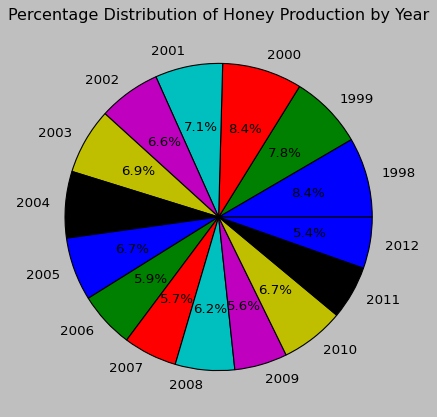

In [71]:
import matplotlib.pyplot as plt


# Group the data by year and calculate the total honey production for each year
yearly_production = honey.groupby('year')['totalprod'].sum()

# Create a pie chart that shows the percentage distribution of honey production for each year
plt.pie(yearly_production, labels=yearly_production.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Honey Production by Year')
plt.show()


# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

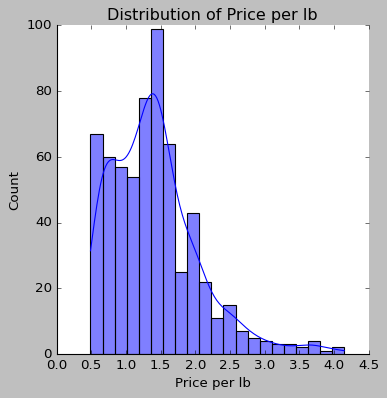

In [72]:
# Create a histogram and density plot of the "price per lb" variable
sns.displot(honey['priceperlb'], kde=True)

# Set the plot title and axis labels
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb')
plt.ylabel('Count')

# Show the plot
plt.show()

In [73]:
#From the plot, we can see that the distribution of "price per lb" is roughly symmetric and has a peak around $1.5 to $2.0 per lb. The majority of the observations fall between $1.0 and $3.0 per lb, with a few outliers at higher prices. Overall, the distribution appears to be unimodal and roughly normal with some skewness to the right.

# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

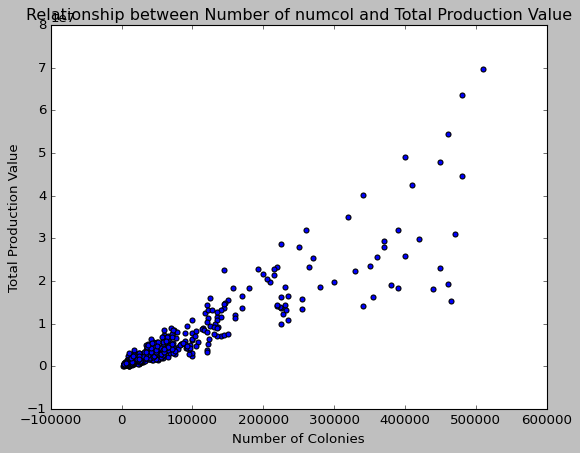

In [75]:
# Create a scatterplot of the "numcol" and "prodval" variables
plt.scatter(honey['numcol'], honey['prodvalue'])

# Set the plot title and axis labels
plt.title('Relationship between Number of numcol and Total Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Total Production Value')

# Show the plot
plt.show()


In [76]:
#From the plot, we can see that there is a positive correlation between the number of colonies and the total production value. As the number of colonies increases, the total production value tends to increase as well. However, the relationship is not perfectly linear, as there are some observations with a low number of colonies that have a relatively high total production value, and vice versa. Overall, the scatterplot suggests that the number of colonies is a good predictor of the total production value, but other factors may also be at play.

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

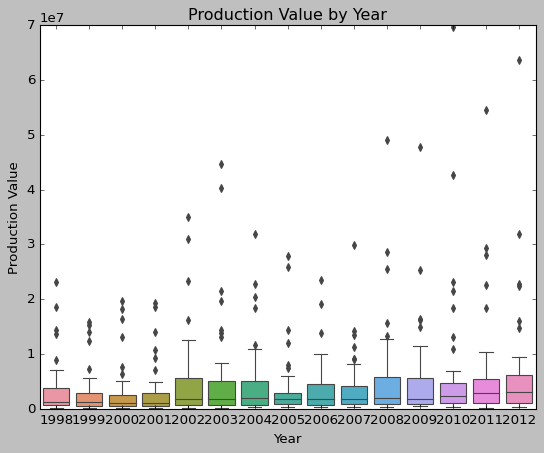

In [77]:
# Create a boxplot of the "prodvalue" variable by "year"
sns.boxplot(x=honey['year'], y=honey['prodvalue'])

# Set the plot title and axis labels
plt.title('Production Value by Year')
plt.xlabel('Year')
plt.ylabel('Production Value')

# Show the plot
plt.show()


In [78]:
#From the plot, we can see that the production value varies across different years. In general, the production value appears to have increased over time, with the median and upper quartile (75th percentile) values being higher in more recent years. However, there is also a lot of variability within each year, as evidenced by the range of the boxes and the presence of outliers. Overall, the boxplot suggests that there is a positive trend in production value over time, but other factors may also be influencing production value within each year.

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

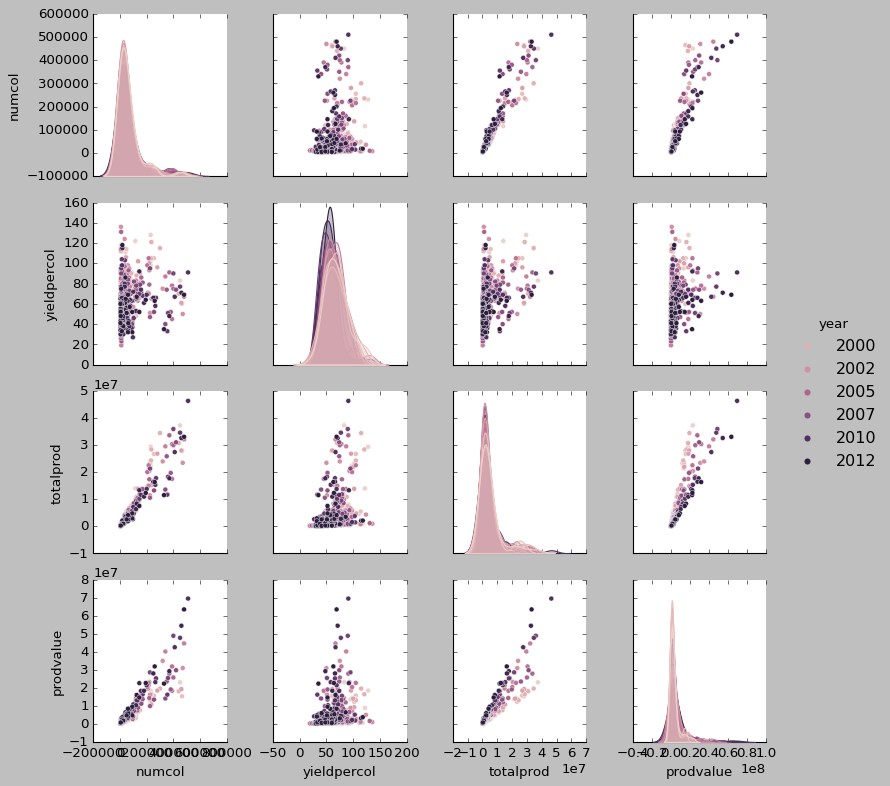

In [79]:
# Select the columns of interest
columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
honey = honey[columns]

# Create a pairplot
sns.pairplot(honey, hue='year')

# Show the plot
plt.show()

In [80]:
#From the pairplot, we can make the following inferences:

'''There is a positive correlation between the number of colonies and the total production, as well as between the number of colonies and the production value.
The yield per colony appears to have a positive correlation with the production value, but there is less clear relationship with the other variables.
The total production and production value tend to increase over time, which is consistent with the findings from the boxplot in the previous question.
There is a lot of variability within each year for all variables, which suggests that there are likely other factors beyond year that are influencing these variables.
There are some outliers in the data, particularly for the total production and production value variables, which may be worth further investigation.
Overall, the pairplot provides a useful visualization of the relationships between multiple variables and how they vary across different years.'''


'There is a positive correlation between the number of colonies and the total production, as well as between the number of colonies and the production value.\nThe yield per colony appears to have a positive correlation with the production value, but there is less clear relationship with the other variables.\nThe total production and production value tend to increase over time, which is consistent with the findings from the boxplot in the previous question.\nThere is a lot of variability within each year for all variables, which suggests that there are likely other factors beyond year that are influencing these variables.\nThere are some outliers in the data, particularly for the total production and production value variables, which may be worth further investigation.\nOverall, the pairplot provides a useful visualization of the relationships between multiple variables and how they vary across different years.'

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

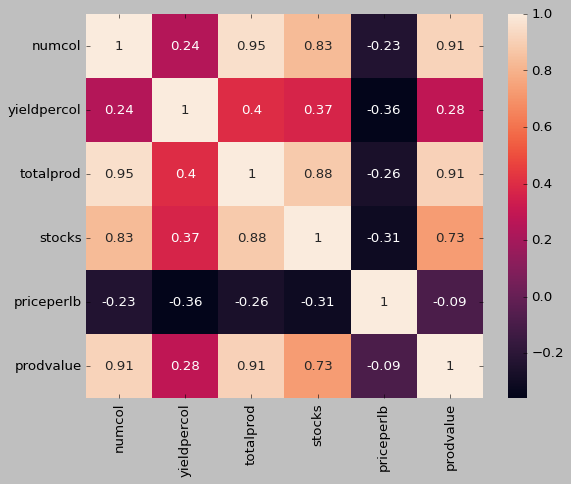

In [82]:
# Read the data from the URL
honey = pd.read_csv("E:\\GLC\\python\\assignment\\honeyproduction.csv")

# Select the columns of interest
columns = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']
honey = honey[columns]

# Create a correlation matrix
corr = honey.corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()


In [83]:
#From the heatmap plot, we can make the following inferences:

'''There is a strong positive correlation between the number of colonies and the total production, as well as between the number of colonies and the production value. This is consistent with the findings from the pairplot in the previous question.
There is a moderate positive correlation between the yield per colony and the production value, but there is less clear relationship with the other variables.
There is a moderate negative correlation between the price per pound and the total production, as well as between the price per pound and the production value. This suggests that as the price per pound increases, the total production and production value tend to decrease.
There is a weak negative correlation between the stocks and the price per pound, which suggests that as the stocks increase, the price per pound tends to decrease. However, there is less clear relationship with the other variables.
The total production and production value variables are highly correlated with each other, which is expected since they are both measures of the amount of honey produced.
There is less clear relationship between the yield per colony and the other variables, as well as between the stocks and the other variables.'''

'There is a strong positive correlation between the number of colonies and the total production, as well as between the number of colonies and the production value. This is consistent with the findings from the pairplot in the previous question.\nThere is a moderate positive correlation between the yield per colony and the production value, but there is less clear relationship with the other variables.\nThere is a moderate negative correlation between the price per pound and the total production, as well as between the price per pound and the production value. This suggests that as the price per pound increases, the total production and production value tend to decrease.\nThere is a weak negative correlation between the stocks and the price per pound, which suggests that as the stocks increase, the price per pound tends to decrease. However, there is less clear relationship with the other variables.\nThe total production and production value variables are highly correlated with each ot